In [5]:
import pandas as pd

df = pd.read_csv("cossim_ppmi.csv")
df["layer_i"] = df["latent_i"] // 32768
df["layer_j"] = df["latent_j"] // 32768
df["latent_i"] = df["latent_i"] % 32768
df["latent_j"] = df["latent_j"] % 32768
df["layers"] = df["layer_i"].astype(str) + "-" + df["layer_j"].astype(str)
df = df.sort_values("layers")

print(df.head())

        latent_i  latent_j  cossim       ppmi  layer_i  layer_j layers
13225      22691     22691     1.0  24.698867        0        0    0-0
226716     15604     15604     1.0  18.181759        0        0    0-0
226717      8859      8859     1.0  18.181759        0        0    0-0
119912     27410     27410     1.0  21.479396        0        0    0-0
197885     10637     10637     1.0  19.519550        0        0    0-0


<Axes: xlabel='cossim', ylabel='ppmi'>

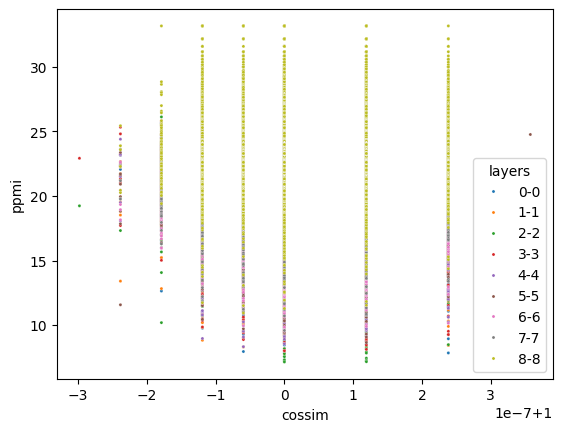

In [2]:
import seaborn as sns

sns.scatterplot(df, x="cossim", y="ppmi", hue="layers", s=5)

In [6]:
# df = df[df["latent_i"] != df["latent_j"]]
df["cossim_ppmi"] = df["cossim"] * df["ppmi"]
df = df.sort_values("cossim_ppmi", ascending=False)
df.head(10)

,latent_i,latent_j,cossim,ppmi,layer_i,layer_j,layers,cossim_ppmi
26,31697,31697,1.0,33.162391,8,8,8-8,33.162399
12,32581,32581,1.0,33.162391,8,8,8-8,33.162395
17,32702,32702,1.0,33.162391,8,8,8-8,33.162395
18,32630,32630,1.0,33.162391,8,8,8-8,33.162395
24,32420,32420,1.0,33.162391,8,8,8-8,33.162395
0,31837,31837,1.0,33.162391,8,8,8-8,33.162391
4,32747,32747,1.0,33.162391,8,8,8-8,33.162391
6,32525,32525,1.0,33.162391,8,8,8-8,33.162391
3,32587,32587,1.0,33.162391,8,8,8-8,33.162391
27,32738,32738,1.0,33.162391,8,8,8-8,33.162391
